In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)

In [2]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data=data.drop('ID#',axis=1)

In [5]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler=MinMaxScaler()
scaled=scaler.fit_transform(data)

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=42)
    km.fit_predict(scaled)
    wcss.append(km.inertia_)

In [10]:
wcss

[1830.7932128584112,
 823.6756984125207,
 625.1684881570719,
 436.7088576193261,
 348.9433217254136,
 315.3155964842891,
 287.73100544224263,
 263.2132188914899,
 245.4061707045836,
 226.1081210825213]

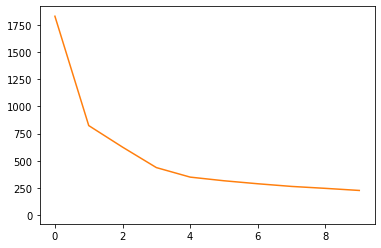

In [11]:
plt.plot(1,10,wcss)

In [12]:
k_m=KMeans(n_clusters=4,random_state=42,max_iter=100)
cluster=k_m.fit(scaled)

In [13]:
cluster=cluster.labels_

In [14]:
cluster=pd.DataFrame(cluster)

In [15]:
cluster

,0
0,0
1,0
2,0
3,0
4,1
5,0
6,3
7,2
8,1
9,1


In [16]:
data.insert(1,'cluster',cluster)

In [17]:
data.head()

,Balance,cluster,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,0,1,1,1,174,1,0,0,7000,0
1,19244,0,0,1,1,1,215,2,0,0,6968,0
2,41354,0,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,0,1,1,1,500,1,0,0,6952,0
4,97752,1,0,4,1,1,43300,26,2077,4,6935,1


In [18]:
data['cluster'].value_counts()

0    1897
1     808
2     673
3     621
Name: cluster, dtype: int64

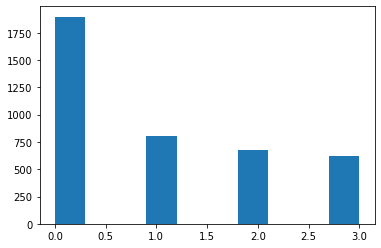

In [19]:
plt.hist(data=data,x='cluster')
plt.show()

In [20]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(scaled,k_m.fit_predict(scaled))

0.47483765255961